In [161]:
import matplotlib.pyplot as plt
import numpy as np

# This plot function is from sklearn

def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x = np.linspace(0, 10, 500)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            #label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        #label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_ylim([-5, 5])
    

Text(0.5, 1.0, 'training data')

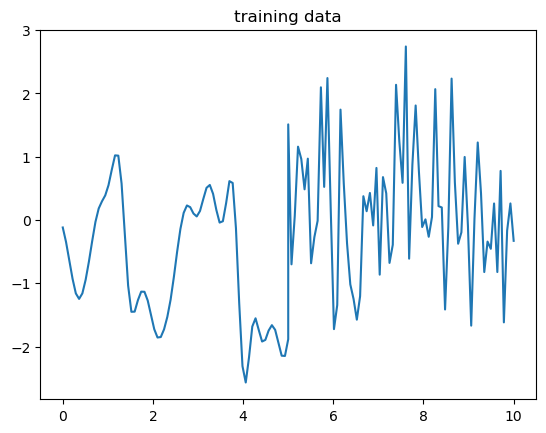

In [162]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# create a training dataset which is the concatenation of two Gaussian processes with different lengthscales

# The first Gaussian process with lengthscale = 1.0
kernel1 = 1.0 * RBF(length_scale=0.2, length_scale_bounds=(1e-1, 10.0))
gpr1 = GaussianProcessRegressor(kernel=kernel1, random_state=0)

# The second one with lengthscale = 0.01
kernel2 = 1.0 * RBF(length_scale=0.01, length_scale_bounds=(1e-1, 10.0))
gpr2 = GaussianProcessRegressor(kernel=kernel2, random_state=0)


# Generate a combined process
n_observations = 70

x1 = np.linspace(0, 5, n_observations)
X1 = x1.reshape(-1, 1)
x2 = np.linspace(5, 10, n_observations)
X2 = x2.reshape(-1, 1)
X = np.concatenate((X1,X2), axis = 0)

y_samples1 = gpr1.sample_y(X1, n_samples=1)
y_samples2 = gpr2.sample_y(X2, n_samples=1)
y_samples = np.concatenate((y_samples1, y_samples2), axis = 0)
y_samples = np.squeeze(y_samples)

plt.plot(X,y_samples)
plt.title('training data')

In [163]:
# Now let's suppose we don't know the underlying mechanism generating the training dataset
# We try to fit the dataset using the posterior of a Gaussian process

# Create another Gaussian process with length_scale = 1.0 (different from the lengthscales of the above processes) 
# and also with a different sigma_f, which is 2.0 (this is the prior distribution over the function space)

kernel = 2.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

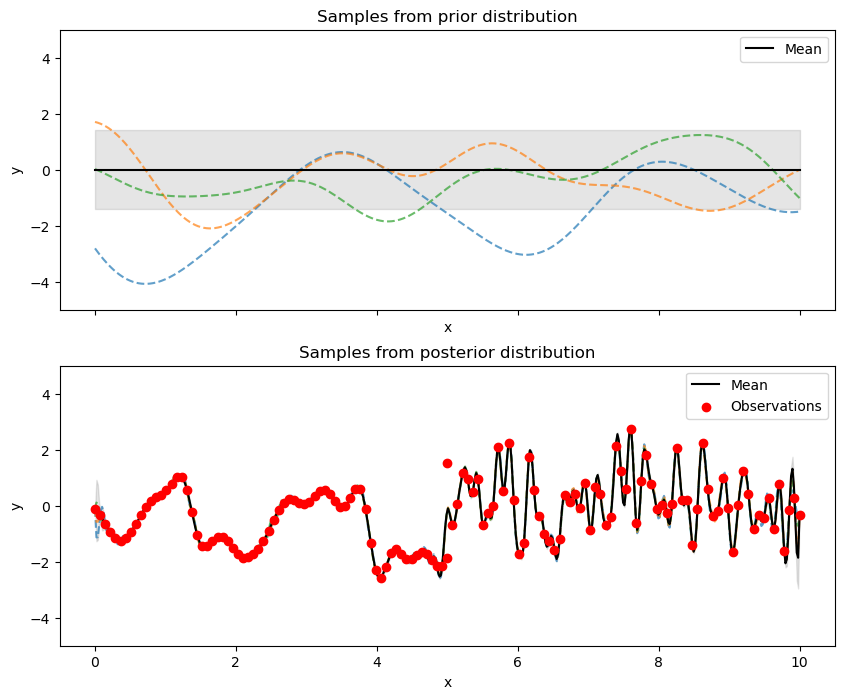

In [164]:
# Now we want to know if the posterior distribution conditioned on observed data can characterize the multiple lengthscales
# nature of the training dataset

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

n_samples = 3

# plot n_samples curves drawn from the prior 
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")
axs[0].legend()

# conditioned on observed data, plot n_samples curves drawn from the posterior
gpr.fit(X, y_samples)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X[:, 0], y_samples, color="red", zorder=10, label="Observations")
axs[1].set_title("Samples from posterior distribution")
axs[1].legend()

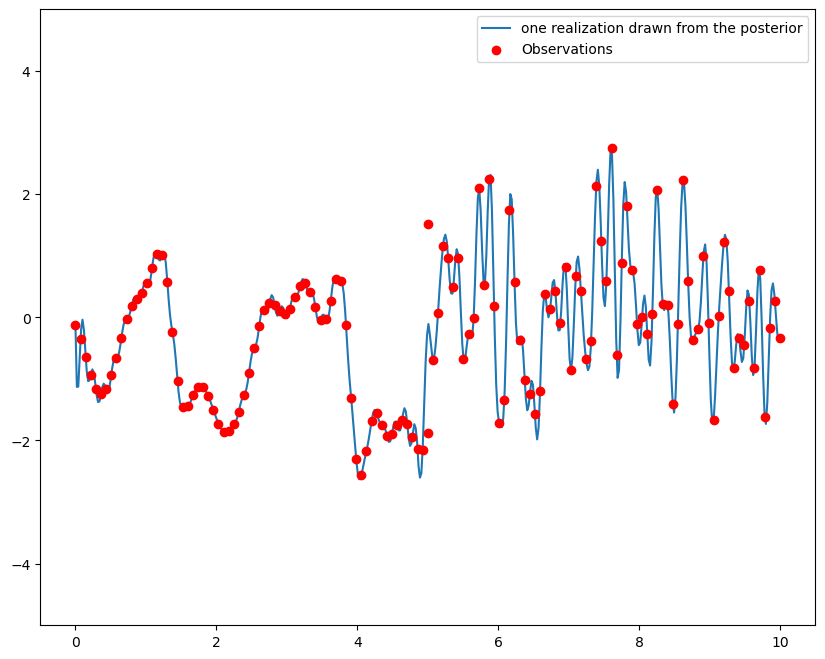

In [165]:
# plot 1 samples from the posterior only 

x_ = np.linspace(0, 10, 500)
X_ = x_.reshape(-1, 1)

y_ = gpr.sample_y(X_, 1)

fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(10, 8))
axs.plot(X_, y_, label="one realization drawn from the posterior")
axs.scatter(X[:, 0], y_samples, color="red", zorder=10, label="Observations")
axs.set_ylim([-5,5])
axs.legend()